In [1]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

You should consider upgrading via the '/media/farhood/Data/Courses/Bio Master Courses/Spring 1400/Machine Learning/Final Project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/farhood/Data/Courses/Bio Master Courses/Spring 1400/Machine Learning/Final Project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/farhood/Data/Courses/Bio Master Courses/Spring 1400/Machine Learning/Final Project/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import os

import pickle
import json

from pathlib import Path
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.manifold import *

from sklearn.pipeline import Pipeline



plt.style.use("ggplot")

In [3]:
with open("data/ml_project_dataset.pkl", "rb") as pkl:
    data = pickle.load(pkl)
cleaned = data.copy()
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     2605 non-null   int64 
 1   Gender  2605 non-null   object
 2   Status  2605 non-null   object
 3   f1      2605 non-null   object
 4   f2      2605 non-null   object
 5   f3      2605 non-null   object
 6   f4      2605 non-null   object
 7   f5      2605 non-null   object
dtypes: int64(1), object(7)
memory usage: 162.9+ KB
None


,Age,Gender,Status,f1,f2,f3,f4,f5
0,28,Female,Happy,"[-0.03723609, -0.020824267, -0.025246128, 0.00...","[-0.0013615170028060675, -0.000550377124454826...","[-0.045345112681388855, 0.049214184284210205, ...","[0.622996985912323, 0.5587776899337769, 0.2035...","[142.0, 268.0, -91.8211441040039, 147.0, 304.0..."
1,24,Male,Sad,"[-0.009315872, -0.0008500488, 0.0008058883, 0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.22100389003753662, 0.0, 0.0, 0.070420034229...","[1302.0, 2091.0, -218.44000244140625, 928.0, 2..."
2,29,M,neutral,"[-0.013662366, 0.03466877, -0.065040134, -0.04...","[-0.008576362393796444, 0.09807106107473373, -...","[-0.002319525694474578, 0.03656185418367386, -...","[0.0, 0.21522775292396545, 0.26262786984443665...","[831.0, 252.0, -65.05692291259766, 909.0, 516...."
3,28,M,happy,"[-0.06278418, -0.03465886, -0.035757925, -0.02...","[0.03950166329741478, 0.1211700439453125, 0.03...","[-0.02030731551349163, 0.0438639298081398, -0....","[0.021185416728258133, 0.015900805592536926, 0...","[796.0, 715.0, -420.5904541015625, 850.0, 845...."
4,25,Male,Normal,"[0.027600960806012154, 0.03169381991028786, -0...","[-0.012523038312792778, 0.1949128955602646, 0....","[-0.024486687034368515, 0.031889624893665314, ...","[0.36306896805763245, 0.45892614126205444, 0.1...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...
2600,21,Female,Neutral,"[-0.08245806396007538, 0.004096889868378639, 0...","[-0.00660118879750371, 0.016428500413894653, 0...","[-0.040763456374406815, 0.0548965260386467, -0...","[0.2818586230278015, 0.0, 0.1590728461742401, ...","[189.0, 377.0, -213.5455780029297, 211.0, 463...."
2601,24,Female,Happy,"[-0.024614291, 0.0066937124, 0.030145485, -0.0...","[0.0009541047620587051, 0.1416327953338623, 0....","[-0.06006622314453125, 0.045196782797575, -0.1...","[0.0, 0.04338845983147621, 0.01060467213392257...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2602,12,Female,Happy,"[-0.03445599973201752, -0.0030360377859324217,...","[-0.011861197650432587, 0.28009411692619324, 0...","[-0.035674870014190674, 0.06552769988775253, -...","[0.5378477573394775, 0.0, 0.39331185817718506,...","[154.0, 310.0, -205.8900146484375, 154.0, 354...."
2603,25,male,happy,"[-0.02918069, 0.032438118, 0.012860616, -0.045...","[0.018076958134770393, 0.13615529239177704, 0....","[-0.04480195418000221, 0.06002373620867729, -0...","[0.0, 0.25327205657958984, 0.14244912564754486...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


### Fixing Bad Status

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(f"Unique status:\n{data['Status'].value_counts()}\n")

Unique status:
sad            473
happy          451
neutral        403
Happy          350
Sad            350
Neutral        205
Normal         145
natural         68
N               30
S               25
H               25
happy           20
0d02ffb6f3       1
610e0ee7bf       1
77ae9e7a51       1
0054a40fde       1
0d02ffb6f5       1
77ae9e7a42       1
601e0ee7bf       1
607e0ee7bf       1
0d02ffb6f4       1
611e0ee7bf       1
602e0ee7bf       1
604e0ee7bf       1
597e0ee7bf       1
77ae9e7a44       1
77ae9e7a47       1
0042a40fde       1
0046a40fde       1
0d02ffb6f11      1
0043a40fde       1
0d02ffb6f15      1
0d02ffb6f9       1
0047a40fde       1
0051a40fde       1
77ae9e7a38       1
77ae9e7a40       1
0050a40fde       1
0048a40fde       1
605e0ee7bf       1
0d02ffb6f8       1
609e0ee7bf       1
0d02ffb6f7       1
0d02ffb6f14      1
0d02ffb6f13      1
77ae9e7a45       1
77ae9e7a46       1
77ae9e7a48       1
608e0ee7bf       1
77ae9e7a52       1
77ae9e7a49       1
599e0ee7bf      

In [5]:
cleaned["Status"] = data["Status"].apply(lambda x: x.upper()[0] if type(x) == str  and x.lower()[0] in  list("nhs") else np.nan)

cleaned.dropna(subset = ['Status'], inplace=True)
print(f"Cleaned labels in 'Status' {cleaned['Status'].unique()}")

Cleaned labels in 'Status' ['H' 'S' 'N']


### Fixing bad genders

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(f"Unique status:\n{cleaned['Gender'].unique()}\n")

cleaned["Gender"] = cleaned["Gender"].apply(lambda x: x.upper()[0])
print(f"Cleaned labels in 'Gender' {cleaned['Gender'].unique()}")

Unique status:
['Female' 'Male' 'M' 'female' 'male' 'F' 'm']

Cleaned labels in 'Gender' ['F' 'M']


## Filling Missing values


In [7]:
print(cleaned.columns)
keys = [f"f{i}" for i in range(1, 6)]

X = [cleaned[k].values.tolist() for k in keys]
feature_set_dims = []

for idx in range(len(X)):
    x = X[idx] = np.array(X[idx])
    nans = np.isnan(x).any(axis=-1).sum()
    print(f"f{idx+1}: has {nans} rows out of {len(x)} with nan values")
    feature_set_dims.append(x.shape[-1])


print(feature_set_dims)
X = np.concatenate(X, axis=1)
print(X.shape)

Index(['Age', 'Gender', 'Status', 'f1', 'f2', 'f3', 'f4', 'f5'], dtype='object')
f1: has 303 rows out of 2545 with nan values
f2: has 262 rows out of 2545 with nan values
f3: has 262 rows out of 2545 with nan values
f4: has 0 rows out of 2545 with nan values
f5: has 877 rows out of 2545 with nan values
[512, 1536, 2304, 2560, 204]
(2545, 7116)


### Splitting dataset into train, val, test sets

In [8]:
from sklearn.model_selection import train_test_split

portions = {
    "val": 0.1,
    "test": 0.2
}   


indices = np.arange(len(X))

non_splitted_indices, test_indices = train_test_split(indices, test_size=portions["test"],
shuffle=True, random_state=42)

train_indices, val_indices = train_test_split(non_splitted_indices, test_size=portions["val"], shuffle=True)


assert len(np.intersect1d(train_indices, test_indices)) == 0
assert len(np.intersect1d(train_indices, val_indices)) == 0
assert len(np.intersect1d(val_indices, test_indices)) == 0

with open("data/processed/indices.json", "w") as jfile:
    json.dump(
        dict(train_indices=train_indices.tolist(), 
        test_indices=test_indices.tolist(), 
        val_indices=val_indices.tolist(),
        feature_dims=feature_set_dims,),
        jfile,
    )


## Imputing

In [9]:
from sklearn.impute import KNNImputer



print(X.shape)

imputer = KNNImputer(n_neighbors=5)

X_train = X[train_indices,...]

imputer.fit(X_train)
X = imputer.transform(X)
print(X.shape)

X_train = X[train_indices]

print(np.isnan(X).sum())



(2545, 7116)
(2545, 7116)
0


# Saving Imputed Dataset

In [10]:
np.savetxt("data/processed/filled.np.gz", X)

### dimension reduction on training data

In [11]:
def compute_variance_info(X_input):
    variance_info = []
    for n in np.unique(np.logspace(np.log10(2), np.log(X_input.shape[1]), num=50, base=10, dtype=int)):
        svd = TruncatedSVD(n_components=n)
        preprocessor = Pipeline(
            [
                ("scaler", StandardScaler()),
                ("svd", svd)
            ]
        )
        preprocessor.fit(X_input)
        explained_variance = svd.explained_variance_ratio_.sum()
        variance_info.append(
            {
                "n_components": n,
                "explained_variance": explained_variance,
                "all_variances": svd.explained_variance_ratio_
            }
        )
        print(f"N Components: {n}, Explained variance: {explained_variance}")
        if explained_variance > 0.95:
            break
    return variance_info

The place where were the difference becomes increasingly small after, and itself has a small variance is a good place to choose as the right **n_components** 

In [12]:
def plot_variance_info(variance_info):
    fig, axes = plt.subplots(3, 1, figsize=(8,15), constrained_layout=True)
    fig.suptitle(f"Dimensionality Reduction Info")
    fig.set_constrained_layout_pads(w_pad=0.5, h_pad=0.2, hspace=0, wspace=0.5)

    axes = list(axes.flat)
    # [ax.set_xscale("log") for ax in axes]

    variance_df = pd.DataFrame(variance_info)


    # Plotting explained variance
    ax = axes[0]
    variance_df.plot("n_components", "explained_variance", ax=ax, legend=False)
    ax.set_title("Explained Variance vs N Components")
    ax.grid("on")
    ax.set_ylabel("Explained Variance")
    ax.set_xlabel("N Components")


    # Plotting variance differences between last and one before last components
    ax = axes[1]
    diff_info = []
    for var_info in variance_info:
        before_last, last = var_info["all_variances"][-2:]
        diff_info.append(
            {
                "difference": before_last - last,
                "n_components": var_info["n_components"],
                "last_var": last,
            }
        )

    diff_info = pd.DataFrame(diff_info)

    diff_info.plot("n_components", "difference", ax = ax, legend=False)
    ax.legend("")
    ax.grid("on")
    ax.set_title("Last Two Components' Difference vs N Components")
    ax.set_ylabel("Difference")
    ax.set_xlabel("N Components")



    # Plotting variance differences between last and one before last components
    ax = axes[2]
    diff_info.plot("n_components", "last_var", ax = ax, legend=False)
    ax.legend("")
    ax.grid("on")
    ax.set_title("Explained Variance in the Nth Component")
    ax.set_ylabel("Variance")
    ax.set_xlabel("Nth Component")


N Components: 2, Explained variance: 0.16564654055866862
N Components: 4, Explained variance: 0.3022252798304702
N Components: 6, Explained variance: 0.400249946910891
N Components: 10, Explained variance: 0.5289926668531904
N Components: 14, Explained variance: 0.599318470802
N Components: 22, Explained variance: 0.6720133285621982
N Components: 33, Explained variance: 0.7330919816115564
N Components: 50, Explained variance: 0.7929706104576232
N Components: 74, Explained variance: 0.8469667855742437
N Components: 112, Explained variance: 0.8991646889828014
N Components: 167, Explained variance: 0.9397843611370285
N Components: 250, Explained variance: 0.9676818987485256


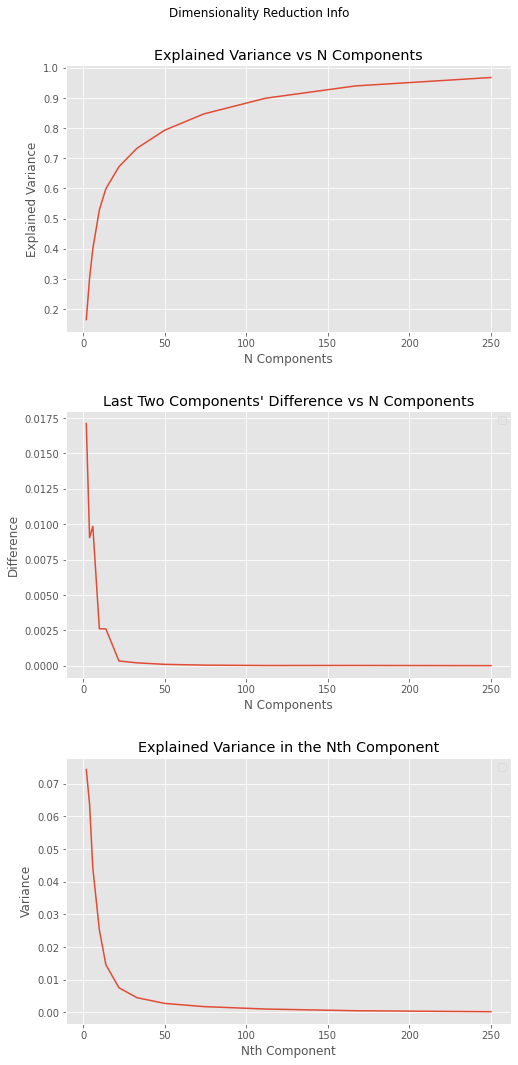

In [13]:
variance_info = compute_variance_info(X_train)
plot_variance_info(variance_info)

In [14]:
n = 25

reducer = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("svd", TruncatedSVD(n_components=n))
    ]
)
reducer.fit(X_train)

# Applying dimension reduction on all data
X_transform = reducer.transform(X)
print(X_transform.shape)

(2545, 25)


### Saving the preprocessed data for further use

preprocessed data + (train, test, val) indices as metadata in a different json files.

In [15]:
final_df = cleaned.copy()

final_df["features"] = X_transform.tolist()
final_df.drop(
    labels = "f1 f2 f3 f4 f5".split(), axis=1, inplace=True
)

In [16]:
import gzip 

save_loc = "data/processed/"
Path(save_loc).mkdir(parents=True, exist_ok=True)


info = {
    "df": final_df.to_dict(),
    "train_indices": train_indices.tolist(),
    "test_indices": test_indices.tolist(),
    "val_indices": val_indices.tolist(),
}


with open(os.path.join(save_loc, "processed_data.json"), "w") as jfile:
    json.dump(info, jfile)